In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import sklearn.model_selection as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from scipy.stats import norm
from pandas_datareader import data
from datetime import datetime

In [2]:
#end = datetime.now()
#start = datetime(end.year - 5, end.month, end.day)
#df = data.DataReader('2800.HK', 'yahoo', start, end)

df=pd.read_csv("C:\\Users\\34353\\Desktop\\2800.HK.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-13,29.299999,29.400000,29.299999,29.400000,29.400000,34388131
1,2017-11-14,29.350000,29.450001,29.299999,29.400000,29.400000,46025199
2,2017-11-15,29.350000,29.350000,29.049999,29.100000,29.100000,66458235
3,2017-11-16,29.200001,29.250000,29.049999,29.200001,29.200001,29574061
4,2017-11-17,29.400000,29.500000,29.299999,29.350000,29.350000,11226153


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

train_rate=0.7

In [5]:
features=df.filter(['Date','Open','Close','High','Low','Volumes','Adj Close'])

def std(nums):
    n = len(nums)
    avg = sum(nums) / n
    return (sum(map(lambda e: (e - avg) * (e - avg), nums)) / n) ** 0.5

In [6]:
#features['pro_rate']=np.log(features['Close'] / features['Close'].shift(1))#计算收益率
features['H-L']=features['High']-features['Low']
features['C-O']=features['Close']-features['Open']
features['7D-MA']=features['Adj Close'].rolling(7).mean()
features['14D-MA']=features['Adj Close'].rolling(14).mean()
features['21D-MA']=features['Adj Close'].rolling(21).mean()
features['7D-SD']=features['Adj Close'].rolling(7).std()

In [7]:
features=features.replace(np.nan,0)#由于计算收益率时第一行数据没有值，把他变成0
train_data_len=math.floor(len(features)*train_rate)
test_data_len=math.floor(len(features)*(1-train_rate))
newdate=features['Date']
x_date=newdate[train_data_len:]


In [8]:
features

,Date,Open,Close,High,Low,Adj Close,H-L,C-O,7D-MA,14D-MA,21D-MA,7D-SD
0,2017-11-13,29.299999,29.400000,29.400000,29.299999,29.400000,0.100001,0.100001,0.000000,0.000000,0.000000,0.000000
1,2017-11-14,29.350000,29.400000,29.450001,29.299999,29.400000,0.150002,0.050000,0.000000,0.000000,0.000000,0.000000
2,2017-11-15,29.350000,29.100000,29.350000,29.049999,29.100000,0.300001,-0.250000,0.000000,0.000000,0.000000,0.000000
3,2017-11-16,29.200001,29.200001,29.250000,29.049999,29.200001,0.200001,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-11-17,29.400000,29.350000,29.500000,29.299999,29.350000,0.200001,-0.050000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2022-11-04,15.540000,16.230000,16.610001,15.530000,16.230000,1.080001,0.690000,15.562857,16.076429,16.555714,0.545152
1228,2022-11-07,16.100000,16.680000,16.930000,16.040001,16.680000,0.889999,0.580000,15.650000,16.013571,16.474762,0.673399
1229,2022-11-08,16.730000,16.670000,16.820000,16.530001,16.670000,0.289999,-0.060000,15.897143,15.977857,16.418571,0.686724
1230,2022-11-09,16.650000,16.459999,16.840000,16.309999,16.459999,0.530001,-0.190001,16.131428,15.945000,16.369524,0.516702


In [9]:
#准备好标签和特征组
def label_data(features):
    labels=np.array(features['Close'])
    features=features.drop('Close',axis=1)#从特征值中去除标签列
    features=features.drop('Date',axis=1)
    features=features.drop('Open',axis=1)
    features=features.drop('High',axis=1)
    features=features.drop('Low',axis=1)
    features=features.drop('Adj Close',axis=1)
    feature_list=list(features.columns)
    features=np.array(features)
    return labels,feature_list,features
labels,feature_list,features=label_data(features)

In [10]:
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.3,random_state=0)

# 创建分类器
clf = GradientBoostingClassifier(n_estimators=10,learning_rate=0.6)
    
# 训练数据
clf.fit(train_features, train_labels.astype('int'))
    
# 测试数据
predtion = clf.predict(test_features)
    
x_date

862     2021-05-14
863     2021-05-17
864     2021-05-18
865     2021-05-20
866     2021-05-21
           ...    
1227    2022-11-04
1228    2022-11-07
1229    2022-11-08
1230    2022-11-09
1231    2022-11-10
Name: Date, Length: 370, dtype: object

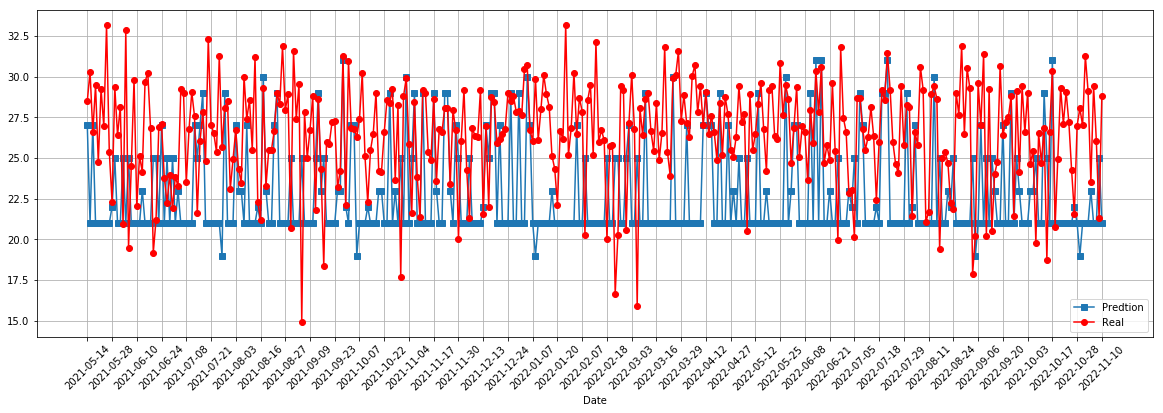

In [11]:
label_date = []                        
arr_date = np.array(x_date)

for i in range(0,len(arr_date),9):
    label_date.append(arr_date[i]) 
                           
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.figure(figsize=(20,6))
plt.plot(predtion,'s-',label='Predtion')
plt.plot(test_labels,'o-',label='Real',color="red")
plt.xlabel('Date')                          
plt.xticks(range(0,len(arr_date),9), label_date)
plt.xticks(rotation=45)

                           
plt.legend(loc=4)
plt.grid()
plt.show()
plt.close()


In [12]:
def get_mse(records_real, records_predict):
    """
    均方误差 估计值与真值 偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_rmse(records_real, records_predict):
    """
    均方根误差：是均方误差的算术平方根
    """
    mse = get_mse(records_real, records_predict)
    if mse:
        return math.sqrt(mse)
    else:
        return None
 
 
def get_mae(records_real, records_predict):
    """
    平均绝对误差
    """
    if len(records_real) == len(records_predict):
        return sum([(x - y)/x for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_mbe(records_real, records_predict):
    
    if len(records_real) == len(records_predict):
        return sum([(x - y) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None
    

In [13]:
RMSE=get_rmse(test_labels,predtion)
RMSE

5.696649181300469

In [14]:
MAE=get_mae(test_labels,predtion)
MAE

0.1241651209867508

In [15]:
MBE=get_mbe(test_labels,predtion)
MBE

3.6844864270270272